<a href="https://colab.research.google.com/github/zzhining/public_data_analysis/blob/main/w13_time_series_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 터널 교통량 데이터
---
*Tunnel Traffic* 는 2003년 11월부터 2005년 11월까지 스위스의 Baregg 터널을 통과하는 차량의 수에 대한 데이터입니다.

## 1. 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `parse_dates` : 지정한 컬럼이 날짜 타입으로 지정
tunnel = pd.read_csv("https://raw.githubusercontent.com/zzhining/time_series_basic/main/dataset/tunnel.csv", parse_dates=["Day"], index_col='Day')

# 시간(DatetimeIndex)을 시계열(PeriodIndex) 형태로 변환
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


## 2. 시간 간격 속성을 사용한 선형 회귀 모델

### 2-1 데이터 전처리

In [3]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [4]:
# 변수 지정
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

### 2-2 선형회귀 알고리즘

In [5]:
from sklearn.linear_model import LinearRegression

# 학습
model = LinearRegression()
model.fit(X, y)
print('model: y = {:.2f} * Time + {:.2f}'.format(model.coef_[0], model.intercept_) )

model: y = 22.50 * Time + 98176.21


### 2-3 예측 결과 확인

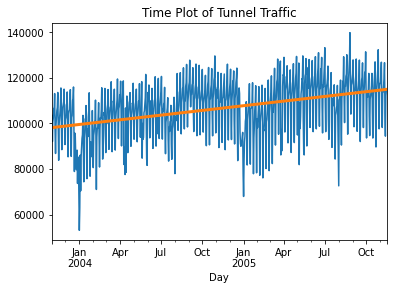

In [6]:
# 예측
y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

## 3. 이전 값을 사용한 선형 회귀 모델


### 3-1 데이터 전처리

 `shift`메서드를 사용하여 지연 속성 생성

In [7]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [8]:
# 결측치 처리
df.dropna(inplace=True)

# 변수 할당
y = df.loc[:, 'NumVehicles']
X = df.loc[:, ['Lag_1']]

### 3-2 선형회귀 알고리즘

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


print('model: y = {:.2f} * Lag_1 + {:.2f}'.format(model.coef_[0], model.intercept_) )

model: y = 0.53 * Lag_1 + 49780.62


### 3-3 예측 결과 확인

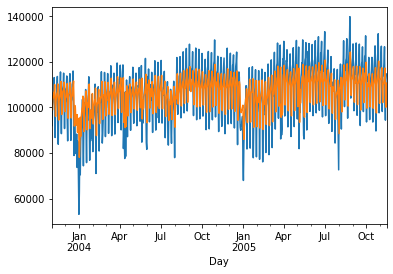

In [10]:
# 예측
y_pred = pd.Series(model.predict(X), index=X.index)

ax = y.plot()
ax = y_pred.plot()

# DeterministicProcess

In [11]:
!pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [1]:
from statsmodels.tsa.deterministic import DeterministicProcess
from pandas import date_range
index = date_range("2000-1-1", freq="M", periods=240)
index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=240, freq='M')

2차원 시간 추세 추가

`in_sample()`은 주어진 `index` 인자에 해당하는 변수들을 생성함

In [2]:
dp = DeterministicProcess(index, constant=True, order=2)
dp.in_sample().head(10)

,const,trend,trend_squared
2000-01-31,1.0,1.0,1.0
2000-02-29,1.0,2.0,4.0
2000-03-31,1.0,3.0,9.0
2000-04-30,1.0,4.0,16.0
2000-05-31,1.0,5.0,25.0
2000-06-30,1.0,6.0,36.0
2000-07-31,1.0,7.0,49.0
2000-08-31,1.0,8.0,64.0
2000-09-30,1.0,9.0,81.0
2000-10-31,1.0,10.0,100.0


In [3]:
dp = DeterministicProcess(index, constant=True, order=2)
dp.in_sample().head(10)

,const,trend,trend_squared
2000-01-31,1.0,1.0,1.0
2000-02-29,1.0,2.0,4.0
2000-03-31,1.0,3.0,9.0
2000-04-30,1.0,4.0,16.0
2000-05-31,1.0,5.0,25.0
2000-06-30,1.0,6.0,36.0
2000-07-31,1.0,7.0,49.0
2000-08-31,1.0,8.0,64.0
2000-09-30,1.0,9.0,81.0
2000-10-31,1.0,10.0,100.0


계절성 더미추가

In [4]:
dp = DeterministicProcess(index, constant=True, seasonal=True)
dp.in_sample()

,const,"s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)","s(10,12)","s(11,12)","s(12,12)"
2000-01-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-29,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-03-31,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-04-30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-05-31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019-09-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-10-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-11-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0



푸리에 구성요소를 추가하여 계절성 요소 추가

In [5]:
dp = DeterministicProcess(index, constant=True, fourier=2)
dp.in_sample().head(10)

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2000-01-31,1.0,0.000000e+00,1.000000e+00,0.000000e+00,1.0
2000-02-29,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2000-03-31,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2000-04-30,1.0,1.000000e+00,6.123234e-17,1.224647e-16,-1.0
2000-05-31,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2000-06-30,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2000-07-31,1.0,1.224647e-16,-1.000000e+00,-2.449294e-16,1.0
2000-08-31,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5
2000-09-30,1.0,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5
2000-10-31,1.0,-1.000000e+00,-1.836970e-16,3.673940e-16,-1.0


In [6]:
dp.out_of_sample(10)

,const,"sin(1,12)","cos(1,12)","sin(2,12)","cos(2,12)"
2020-01-31,1.0,-4.898587e-15,1.000000e+00,-9.797174e-15,1.0
2020-02-29,1.0,5.000000e-01,8.660254e-01,8.660254e-01,0.5
2020-03-31,1.0,8.660254e-01,5.000000e-01,8.660254e-01,-0.5
2020-04-30,1.0,1.000000e+00,1.028889e-14,2.057778e-14,-1.0
2020-05-31,1.0,8.660254e-01,-5.000000e-01,-8.660254e-01,-0.5
2020-06-30,1.0,5.000000e-01,-8.660254e-01,-8.660254e-01,0.5
2020-07-31,1.0,1.567919e-14,-1.000000e+00,-3.135839e-14,1.0
2020-08-31,1.0,-5.000000e-01,-8.660254e-01,8.660254e-01,0.5
2020-09-30,1.0,-8.660254e-01,-5.000000e-01,8.660254e-01,-0.5
2020-10-31,1.0,-1.000000e+00,7.352214e-15,-1.470443e-14,-1.0


# 트렌드

## 1. 데이터 불러오기
Tunnel Traffic dataset을 사용하여 트렌드를 확인하고, 시계열 예측 모델을 생성합니다.

In [10]:
!git clone https://github.com/zzhining/time_series_basic.git

Cloning into 'time_series_basic'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 79 (delta 28), reused 17 (delta 0), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time_series_basic.util as util

tunnel = pd.read_csv("https://raw.githubusercontent.com/zzhining/time_series_basic/main/dataset/tunnel.csv", parse_dates=["Day"], index_col='Day')

tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


## 2. 트렌드 확인하기
이동 평균을 구하기 위해, rolling()을 사용하여 윈도우에 따른 평균값을 계산합니다.

* window=365: 365일을 기준으로 창을 생성
* center=True: 중간값을 기준으로 연산 수행
* min_periods=183: 연산을 위해 필요한 최소 데이터의 수

In [9]:
moving_average = tunnel.rolling(window=365, center=True, min_periods=183).mean()    
moving_average.head()

,NumVehicles
Day,
2003-11-01,99127.426230
2003-11-02,99094.489130
2003-11-03,99112.481081
2003-11-04,99146.639785
2003-11-05,99196.122995


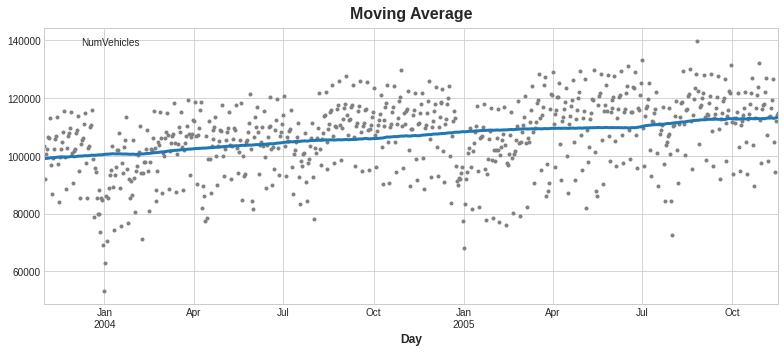

In [14]:
util.init_plt()
ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(ax=ax, linewidth=3, title="Moving Average", legend=False,);

터널 교통량의 추세는 선형 관계임을 확인할 수 있음

## 3. 데이터 전처리

In [15]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=tunnel.index, constant=True, order=1, drop=True)

X = dp.in_sample()
y = tunnel["NumVehicles"]  
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


## 4. 학습

독립변수로 `const`항을 사용하므로, 매개변수 `fit_intercept=False`로 설정하여 중복된 항목이 생기지 않도록 설정

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

## 5. 예측

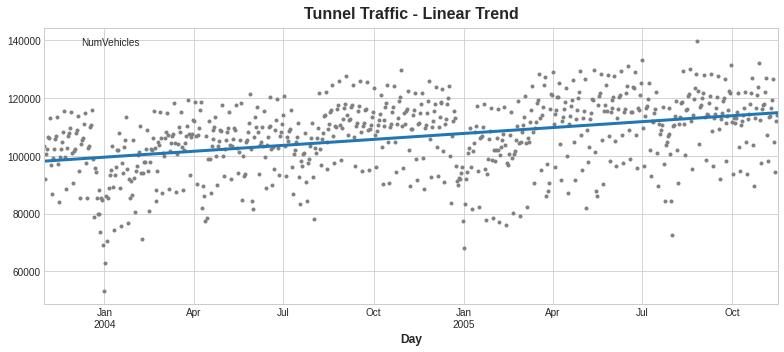

In [17]:
y_pred = pd.Series(model.predict(X), index=X.index)

ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

`LinearRegression` 모델의 예측결과가 이동평균플롯과 거의 유사하다. 즉 1차원 선형 트렌드를 적용하여 예측한 것이 적합함을 알 수 있다. 30일 이후의 값을 예측하기 위해 `out_of_sample()`을 생성한다.

In [18]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

30일 이후의 예측 결과를 함께 플롯

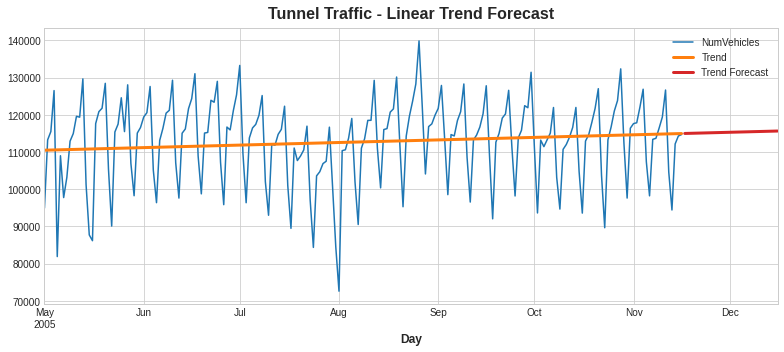

In [19]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast")
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()